## 6. Pandas_2



### Groupby 1

SQL groupby 명령어와 같음

* split - apply - combine 순으로 연산

df.groupby("묶음 기준이 되는 columns")["대상이 되는 columns"].연산()

In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [4]:
ipl_data = {
    "Team": [
        "Riders",
        "Riders",
        "Devils",
        "Devils",
        "Kings",
        "kings",
        "Kings",
        "Kings",
        "Riders",
        "Royals",
        "Royals",
        "Riders",
    ],
    "Rank": [1, 2, 2, 3, 3, 4, 1, 1, 2, 4, 1, 2],
    "Year": [2014, 2015, 2014, 2015, 2014, 2015, 2016, 2017, 2016, 2014, 2015, 2017],
    "Points": [876, 789, 863, 673, 741, 812, 756, 788, 694, 701, 804, 690],
}

df = pd.DataFrame(ipl_data)

df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [5]:
df.groupby("Team")["Points"].sum()

Team
Devils    1536
Kings     2285
Riders    3049
Royals    1505
kings      812
Name: Points, dtype: int64

### Hierarchical index
두 개의 column으로 groupby를 할 경우, index가 두개 생성
* 여기서는 Team, Year가 두칸의 index 구성이 됨

In [7]:
h_index = df.groupby(['Team','Year'])["Points"].sum()
h_index

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2016    756
        2017    788
Riders  2014    876
        2015    789
        2016    694
        2017    690
Royals  2014    701
        2015    804
kings   2015    812
Name: Points, dtype: int64

* unstack() : Group으로 묶여진 데이터를 matrix 형태로 전환해줌

In [8]:
h_index.unstack()

Year,2014,2015,2016,2017
Team,,,,
Devils,863.0,673.0,NaN,NaN
Kings,741.0,NaN,756.0,788.0
Riders,876.0,789.0,694.0,690.0
Royals,701.0,804.0,NaN,NaN
kings,NaN,812.0,NaN,NaN


In [10]:
h_index.index

MultiIndex([('Devils', 2014),
            ('Devils', 2015),
            ( 'Kings', 2014),
            ( 'Kings', 2016),
            ( 'Kings', 2017),
            ('Riders', 2014),
            ('Riders', 2015),
            ('Riders', 2016),
            ('Riders', 2017),
            ('Royals', 2014),
            ('Royals', 2015),
            ( 'kings', 2015)],
           names=['Team', 'Year'])

In [11]:
h_index["Devils":"Kings"]

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2016    756
        2017    788
Name: Points, dtype: int64

In [13]:
h_index.reset_index() # index를 다시 만들어줌

,Team,Year,Points
0,Devils,2014,863
1,Devils,2015,673
2,Kings,2014,741
3,Kings,2016,756
4,Kings,2017,788
5,Riders,2014,876
6,Riders,2015,789
7,Riders,2016,694
8,Riders,2017,690
9,Royals,2014,701


* swaplevel : Index level을 변경할 수 있음

In [14]:
h_index

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2016    756
        2017    788
Riders  2014    876
        2015    789
        2016    694
        2017    690
Royals  2014    701
        2015    804
kings   2015    812
Name: Points, dtype: int64

* sort_index
* sort_values

In [19]:
h_index.sort_index(level=0) # Team index 기준으로 sort

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2016    756
        2017    788
Riders  2014    876
        2015    789
        2016    694
        2017    690
Royals  2014    701
        2015    804
kings   2015    812
Name: Points, dtype: int64

In [20]:
h_index.sort_index(level=1) 

Team    Year
Devils  2014    863
Kings   2014    741
Riders  2014    876
Royals  2014    701
Devils  2015    673
Riders  2015    789
Royals  2015    804
kings   2015    812
Kings   2016    756
Riders  2016    694
Kings   2017    788
Riders  2017    690
Name: Points, dtype: int64

In [21]:
h_index.sort_values()

Team    Year
Devils  2015    673
Riders  2017    690
        2016    694
Royals  2014    701
Kings   2014    741
        2016    756
        2017    788
Riders  2015    789
Royals  2015    804
kings   2015    812
Devils  2014    863
Riders  2014    876
Name: Points, dtype: int64

In [15]:
h_index.swaplevel() # Year - Team 이 서로 위치를 바꿈

Year  Team  
2014  Devils    863
2015  Devils    673
2014  Kings     741
2016  Kings     756
2017  Kings     788
2014  Riders    876
2015  Riders    789
2016  Riders    694
2017  Riders    690
2014  Royals    701
2015  Royals    804
      kings     812
Name: Points, dtype: int64

Hierarchical index는 Series 데이터 형태

* level만 잘 지정하면 std, sum 등을 사용할 수 있다.

In [22]:
h_index.std(level=0)

Team
Devils    134.350288
Kings      24.006943
Riders     88.567771
Royals     72.831998
kings            NaN
Name: Points, dtype: float64

In [24]:
h_index.sum(level=1)

Year
2014    3181
2015    3078
2016    1450
2017    1478
Name: Points, dtype: int64

### Groupby - gropued

Groupby에 의해 Split된 상태를 추출 가능함, 추출된 Group 정보에는 세가지 유형의 Apply가 가능, Apply는 **column 별 적용**

* Aggregation : 요약된 통계정보를 추출해 줌
* Transformation : 해당 정보를 변환해줌
* Filteration : 특정 정보를 제거 하여 보여주는 필터링 기능

In [25]:
grouped = df.groupby("Team")
grouped # Generater 형태

In [26]:
for name, group in grouped: # name : Key , group : Value
    print(name)
    print(group)

Devils
     Team  Rank  Year  Points
2  Devils     2  2014     863
3  Devils     3  2015     673
Kings
    Team  Rank  Year  Points
4  Kings     3  2014     741
6  Kings     1  2016     756
7  Kings     1  2017     788
Riders
      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
8   Riders     2  2016     694
11  Riders     2  2017     690
Royals
      Team  Rank  Year  Points
9   Royals     4  2014     701
10  Royals     1  2015     804
kings
    Team  Rank  Year  Points
5  kings     4  2015     812


In [28]:
type(group)

pandas.core.frame.DataFrame

* get_group : 특정 Key 값을 가진 그룹의 정보만 추출 가능

In [29]:
grouped.get_group("Devils")

,Team,Rank,Year,Points
2,Devils,2,2014,863
3,Devils,3,2015,673


* aggreation

In [33]:
grouped.agg(max)

,Rank,Year,Points
Team,,,
Devils,3,2015,863
Kings,3,2017,788
Riders,2,2017,876
Royals,4,2015,804
kings,4,2015,812


In [30]:
grouped.agg(sum)

,Rank,Year,Points
Team,,,
Devils,5,4029,1536
Kings,5,6047,2285
Riders,7,8062,3049
Royals,5,4029,1505
kings,4,2015,812


In [31]:
import numpy as np
grouped.agg(np.mean)

,Rank,Year,Points
Team,,,
Devils,2.500000,2014.500000,768.000000
Kings,1.666667,2015.666667,761.666667
Riders,1.750000,2015.500000,762.250000
Royals,2.500000,2014.500000,752.500000
kings,4.000000,2015.000000,812.000000


In [32]:
grouped['Points'].agg([np.sum, np.mean, np.std])

,sum,mean,std
Team,,,
Devils,1536,768.000000,134.350288
Kings,2285,761.666667,24.006943
Riders,3049,762.250000,88.567771
Royals,1505,752.500000,72.831998
kings,812,812.000000,NaN


In [35]:
grouped.describe().T

Team               Devils        Kings       Riders       Royals   kings
Rank   count     2.000000     3.000000     4.000000     2.000000     1.0
       mean      2.500000     1.666667     1.750000     2.500000     4.0
       std       0.707107     1.154701     0.500000     2.121320     NaN
       min       2.000000     1.000000     1.000000     1.000000     4.0
       25%       2.250000     1.000000     1.750000     1.750000     4.0
       50%       2.500000     1.000000     2.000000     2.500000     4.0
       75%       2.750000     2.000000     2.000000     3.250000     4.0
       max       3.000000     3.000000     2.000000     4.000000     4.0
Year   count     2.000000     3.000000     4.000000     2.000000     1.0
       mean   2014.500000  2015.666667  2015.500000  2014.500000  2015.0
       std       0.707107     1.527525     1.290994     0.707107     NaN
       min    2014.000000  2014.000000  2014.000000  2014.000000  2015.0
       25%    2014.250000  2015.000000  2014.750000  2014.250000  2015.0
       50%    2014.500000  2016.000000  2015.500000  2014.500000  2015.0
       75%    2014.750000  2016.500000  2016.250000  2014.750000  2015.0
       max    2015.000000  2017.000000  2017.000000  2015.000000  2015.0
Points count     2.000000     3.000000     4.000000     2.000000     1.0
       mean    768.000000   761.666667   762.250000   752.500000   812.0
       std     134.350288    24.006943    88.567771    72.831998     NaN
       min     673.000000   741.000000   690.000000   701.000000   812.0
       25%     720.500000   748.500000   693.000000   726.750000   812.0
       50%     768.000000   756.000000   741.500000   752.500000   812.0
       75%     815.500000   772.000000   810.750000   778.250000   812.0
       max     863.000000   788.000000   876.000000   804.000000   812.0

* Transformation : 개별 데이터의 변환을 지원함, Grouped된 데이터 기준 Column 별로 동일한 적용. Aggregation과 달리 key값 별로 요약된 정보가 아님

In [36]:
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [37]:
score = lambda x: (x)
grouped.transform(score)

,Rank,Year,Points
0,1,2014,876
1,2,2015,789
2,2,2014,863
3,3,2015,673
4,3,2014,741
5,4,2015,812
6,1,2016,756
7,1,2017,788
8,2,2016,694
9,4,2014,701


In [38]:
score = lambda x: (x.max())
grouped.transform(score)

,Rank,Year,Points
0,2,2017,876
1,2,2017,876
2,3,2015,863
3,3,2015,863
4,3,2017,788
5,4,2015,812
6,3,2017,788
7,3,2017,788
8,2,2017,876
9,4,2015,804


In [39]:
score = lambda x: (x - x.mean()) / x.std() # Normalization
grouped.transform(score)

,Rank,Year,Points
0,-1.500000,-1.161895,1.284327
1,0.500000,-0.387298,0.302029
2,-0.707107,-0.707107,0.707107
3,0.707107,0.707107,-0.707107
4,1.154701,-1.091089,-0.860862
5,NaN,NaN,NaN
6,-0.577350,0.218218,-0.236043
7,-0.577350,0.872872,1.096905
8,0.500000,0.387298,-0.770596
9,0.707107,-0.707107,-0.707107


In [40]:
grouped.transform(lambda x : x)

,Rank,Year,Points
0,1,2014,876
1,2,2015,789
2,2,2014,863
3,3,2015,673
4,3,2014,741
5,4,2015,812
6,1,2016,756
7,1,2017,788
8,2,2016,694
9,4,2014,701


* fiter : 특정 조건으로 데이터를 검색할 때 사용

In [43]:
df['Team'].value_counts()

Riders    4
Kings     3
Royals    2
Devils    2
kings     1
Name: Team, dtype: int64

In [41]:
df.groupby("Team").filter(lambda x: len(x) >=3) # Team별로 3개 이상의 데이터가 존재하는 경우만

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
4,Kings,3,2014,741
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
11,Riders,2,2017,690


In [46]:
df.groupby("Team").filter(lambda x: x['Points'].mean() > 1000)

,Team,Rank,Year,Points


In [49]:
df.groupby("Team").filter(lambda x: x['Points'].mean() > 760)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
11,Riders,2,2017,690


### Data - case study

In [52]:
df_phone = pd.read_csv('phone_data.csv')
df_phone

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...,...
825,825,13/03/15 00:38,1.000,sms,2015-03,world,world
826,826,13/03/15 00:39,1.000,sms,2015-03,Vodafone,mobile
827,827,13/03/15 06:58,34.429,data,2015-03,data,data
828,828,14/03/15 00:13,1.000,sms,2015-03,world,world


In [53]:
df_phone.dtypes # date가 object 형, string type

index             int64
date             object
duration        float64
item             object
month            object
network          object
network_type     object
dtype: object

In [54]:
import dateutil

df_phone['date'] = df_phone['date'].apply(dateutil.parser.parse, dayfirst=True)
df_phone.head()

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile


In [55]:
df_phone.dtypes

index                    int64
date            datetime64[ns]
duration               float64
item                    object
month                   object
network                 object
network_type            object
dtype: object

In [57]:
df_phone.groupby("month")['duration'].sum()

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

In [58]:
df_phone.groupby("month")['duration'].mean()

month
2014-11    115.823657
2014-12     93.260318
2015-01     88.894141
2015-02    113.301453
2015-03    225.251891
Name: duration, dtype: float64

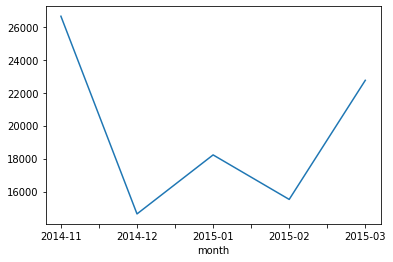

In [59]:
df_phone.groupby("month")['duration'].sum().plot()

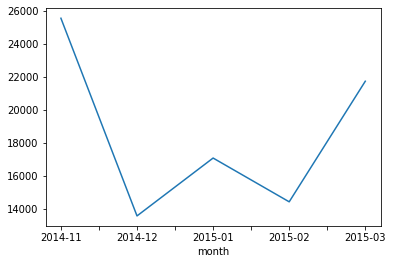

In [60]:
df_phone[df_phone['item']=='call'].groupby("month")['duration'].sum().plot()

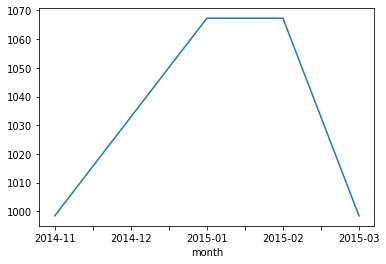

In [61]:
df_phone[df_phone['item']=='data'].groupby("month")['duration'].sum().plot()

In [63]:
df_phone.groupby(["month","item"])['duration'].count()

month    item
2014-11  call    107
         data     29
         sms      94
2014-12  call     79
         data     30
         sms      48
2015-01  call     88
         data     31
         sms      86
2015-02  call     67
         data     31
         sms      39
2015-03  call     47
         data     29
         sms      25
Name: duration, dtype: int64

In [64]:
df_phone.groupby(["month","item"])['duration'].count().unstack()

item,call,data,sms
month,,,
2014-11,107,29,94
2014-12,79,30,48
2015-01,88,31,86
2015-02,67,31,39
2015-03,47,29,25


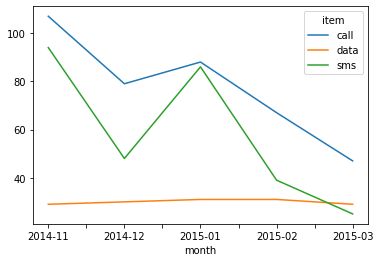

In [65]:
df_phone.groupby(["month","item"])['duration'].count().unstack().plot()

In [73]:
df_phone.groupby(["month","item"])['duration'].sum()

month    item
2014-11  call    25547.000
         data      998.441
         sms        94.000
2014-12  call    13561.000
         data     1032.870
         sms        48.000
2015-01  call    17070.000
         data     1067.299
         sms        86.000
2015-02  call    14416.000
         data     1067.299
         sms        39.000
2015-03  call    21727.000
         data      998.441
         sms        25.000
Name: duration, dtype: float64

* agg 예제

In [69]:
df_phone.groupby("month", as_index=False).agg({"duration" : "sum"})
#as_index=False , month를 index로 안쓰겠다.

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [70]:
df_phone.groupby("month").agg({"duration" : "sum"}).reset_index()

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [72]:
df_phone.groupby(['month','item']).agg(
    {
        "duration" : "sum",
        "network_type" : "count",
        "date" : "first"
    }
)

duration  network_type                date
month   item                                             
2014-11 call  25547.000           107 2014-10-15 06:58:00
        data    998.441            29 2014-10-15 06:58:00
        sms      94.000            94 2014-10-16 22:18:00
2014-12 call  13561.000            79 2014-11-14 17:24:00
        data   1032.870            30 2014-11-13 06:58:00
        sms      48.000            48 2014-11-14 17:28:00
2015-01 call  17070.000            88 2014-12-15 20:03:00
        data   1067.299            31 2014-12-13 06:58:00
        sms      86.000            86 2014-12-15 19:56:00
2015-02 call  14416.000            67 2015-01-15 10:36:00
        data   1067.299            31 2015-01-13 06:58:00
        sms      39.000            39 2015-01-15 12:23:00
2015-03 call  21727.000            47 2015-02-12 20:15:00
        data    998.441            29 2015-02-13 06:58:00
        sms      25.000            25 2015-02-19 18:46:00

In [77]:
df_phone.groupby(['month','item']).agg({'duration' : [min, max, sum],
                                       'network_type' : "count",
                                       'date' : [min, 'first', 'nunique']})

duration                       network_type                date  \
                  min        max        sum        count                 min   
month   item                                                                   
2014-11 call    1.000   1940.000  25547.000          107 2014-10-15 06:58:00   
        data   34.429     34.429    998.441           29 2014-10-15 06:58:00   
        sms     1.000      1.000     94.000           94 2014-10-16 22:18:00   
2014-12 call    2.000   2120.000  13561.000           79 2014-11-14 17:24:00   
        data   34.429     34.429   1032.870           30 2014-11-13 06:58:00   
        sms     1.000      1.000     48.000           48 2014-11-14 17:28:00   
2015-01 call    2.000   1859.000  17070.000           88 2014-12-15 20:03:00   
        data   34.429     34.429   1067.299           31 2014-12-13 06:58:00   
        sms     1.000      1.000     86.000           86 2014-12-15 19:56:00   
2015-02 call    1.000   1863.000  14416.000           67 2015-01-15 10:36:00   
        data   34.429     34.429   1067.299           31 2015-01-13 06:58:00   
        sms     1.000      1.000     39.000           39 2015-01-15 12:23:00   
2015-03 call    2.000  10528.000  21727.000           47 2015-02-12 20:15:00   
        data   34.429     34.429    998.441           29 2015-02-13 06:58:00   
        sms     1.000      1.000     25.000           25 2015-02-19 18:46:00   

                                          
                           first nunique  
month   item                              
2014-11 call 2014-10-15 06:58:00     104  
        data 2014-10-15 06:58:00      29  
        sms  2014-10-16 22:18:00      79  
2014-12 call 2014-11-14 17:24:00      76  
        data 2014-11-13 06:58:00      30  
        sms  2014-11-14 17:28:00      41  
2015-01 call 2014-12-15 20:03:00      84  
        data 2014-12-13 06:58:00      31  
        sms  2014-12-15 19:56:00      58  
2015-02 call 2015-01-15 10:36:00      67  
        data 2015-01-13 06:58:00      31  
        sms  2015-01-15 12:23:00      27  
2015-03 call 2015-02-12 20:15:00      47  
        data 2015-02-13 06:58:00      29  
        sms  2015-02-19 18:46:00      17

In [87]:
grouped = df_phone.groupby('month').agg( {"duration" : [min, max, np.mean]})

In [88]:
grouped

duration                     
             min      max        mean
month                                
2014-11      1.0   1940.0  115.823657
2014-12      1.0   2120.0   93.260318
2015-01      1.0   1859.0   88.894141
2015-02      1.0   1863.0  113.301453
2015-03      1.0  10528.0  225.251891

In [89]:
grouped.columns = grouped.columns.droplevel(level=0)
grouped.columns

Index(['min', 'max', 'mean'], dtype='object')

In [90]:
grouped.rename(columns={'min' : 'min_duration', 'max' : 'max_duration',
                       'mean' : 'mean_duration'})

,min_duration,max_duration,mean_duration
month,,,
2014-11,1.0,1940.0,115.823657
2014-12,1.0,2120.0,93.260318
2015-01,1.0,1859.0,88.894141
2015-02,1.0,1863.0,113.301453
2015-03,1.0,10528.0,225.251891


#### add_prefix
columns의 앞에 명칭을 추가

In [91]:
grouped = df_phone.groupby('month').agg( {"duration" : [min, max, np.mean]})
grouped

duration                     
             min      max        mean
month                                
2014-11      1.0   1940.0  115.823657
2014-12      1.0   2120.0   93.260318
2015-01      1.0   1859.0   88.894141
2015-02      1.0   1863.0  113.301453
2015-03      1.0  10528.0  225.251891

In [94]:
grouped.columns = grouped.columns.droplevel(level=0)
grouped.columns

Index(['min', 'max', 'mean'], dtype='object')

In [95]:
grouped.add_prefix("duraction_")

,duraction_min,duraction_max,duraction_mean
month,,,
2014-11,1.0,1940.0,115.823657
2014-12,1.0,2120.0,93.260318
2015-01,1.0,1859.0,88.894141
2015-02,1.0,1863.0,113.301453
2015-03,1.0,10528.0,225.251891


### Pivot table & Crosstab

#### Pivot table
Column에 추가로 labeling 값을 추가하고, Value에는 numeric type 값을 aggreation 하는 형태

* Index 축은 groupby와 동일

In [96]:
df_phone

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...,...
825,825,2015-03-13 00:38:00,1.000,sms,2015-03,world,world
826,826,2015-03-13 00:39:00,1.000,sms,2015-03,Vodafone,mobile
827,827,2015-03-13 06:58:00,34.429,data,2015-03,data,data
828,828,2015-03-14 00:13:00,1.000,sms,2015-03,world,world


In [97]:
df_phone.pivot_table(
    values=["duration"],
    index=[df_phone.month, df_phone.item],
    columns=df_phone.network,
    aggfunc="sum",
    fill_value=0 # NaN 값은 0으로 대체
)

duration                                                   \
network        Meteor Tesco  Three Vodafone      data landline special   
month   item                                                             
2014-11 call     1521  4045  12458     4316     0.000     2906       0   
        data        0     0      0        0   998.441        0       0   
        sms        10     3     25       55     0.000        0       1   
2014-12 call     2010  1819   6316     1302     0.000     1424       0   
        data        0     0      0        0  1032.870        0       0   
        sms        12     1     13       18     0.000        0       0   
2015-01 call     2207  2904   6445     3626     0.000     1603       0   
        data        0     0      0        0  1067.299        0       0   
        sms        10     3     33       40     0.000        0       0   
2015-02 call     1188  4087   6279     1864     0.000      730       0   
        data        0     0      0        0  1067.299        0       0   
        sms         1     2     11       23     0.000        0       2   
2015-03 call      274   973   4966     3513     0.000    11770       0   
        data        0     0      0        0   998.441        0       0   
        sms         0     4      5       13     0.000        0       0   

                              
network      voicemail world  
month   item                  
2014-11 call       301     0  
        data         0     0  
        sms          0     0  
2014-12 call       690     0  
        data         0     0  
        sms          0     4  
2015-01 call       285     0  
        data         0     0  
        sms          0     0  
2015-02 call       268     0  
        data         0     0  
        sms          0     0  
2015-03 call       231     0  
        data         0     0  
        sms          0     3

In [99]:
# Pivot 과 유사
df_phone.groupby(["month", "item",'network'])["duration"].sum().unstack()

network       Meteor   Tesco    Three  Vodafone      data  landline  special  \
month   item                                                                   
2014-11 call  1521.0  4045.0  12458.0    4316.0       NaN    2906.0      NaN   
        data     NaN     NaN      NaN       NaN   998.441       NaN      NaN   
        sms     10.0     3.0     25.0      55.0       NaN       NaN      1.0   
2014-12 call  2010.0  1819.0   6316.0    1302.0       NaN    1424.0      NaN   
        data     NaN     NaN      NaN       NaN  1032.870       NaN      NaN   
        sms     12.0     1.0     13.0      18.0       NaN       NaN      NaN   
2015-01 call  2207.0  2904.0   6445.0    3626.0       NaN    1603.0      NaN   
        data     NaN     NaN      NaN       NaN  1067.299       NaN      NaN   
        sms     10.0     3.0     33.0      40.0       NaN       NaN      NaN   
2015-02 call  1188.0  4087.0   6279.0    1864.0       NaN     730.0      NaN   
        data     NaN     NaN      NaN       NaN  1067.299       NaN      NaN   
        sms      1.0     2.0     11.0      23.0       NaN       NaN      2.0   
2015-03 call   274.0   973.0   4966.0    3513.0       NaN   11770.0      NaN   
        data     NaN     NaN      NaN       NaN   998.441       NaN      NaN   
        sms      NaN     4.0      5.0      13.0       NaN       NaN      NaN   

network       voicemail  world  
month   item                    
2014-11 call      301.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2014-12 call      690.0    NaN  
        data        NaN    NaN  
        sms         NaN    4.0  
2015-01 call      285.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2015-02 call      268.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2015-03 call      231.0    NaN  
        data        NaN    NaN  
        sms         NaN    3.0

#### Crosstab
A,B의 상관관계 등을 표현할때 사용

* Pivot table의 특수한 형태 
* User-Item Rating Matrix 등을 만들 때 사용가능

In [100]:
df_movie = pd.read_csv("https://raw.githubusercontent.com/TeamLab/machine_learning_from_scratch_with_python/master/code/ch5/data/movie_rating.csv")
df_movie.head()

,critic,title,rating
0,Jack Matthews,Lady in the Water,3.0
1,Jack Matthews,Snakes on a Plane,4.0
2,Jack Matthews,You Me and Dupree,3.5
3,Jack Matthews,Superman Returns,5.0
4,Jack Matthews,The Night Listener,3.0


In [103]:
df_movie.pivot_table(
    values=['rating'],
    index=df_movie.critic,
    columns=df_movie.title,
    aggfunc="sum",
    fill_value=0)

rating                                      \
title         Just My Luck Lady in the Water Snakes on a Plane   
critic                                                           
Claudia Puig           3.0               0.0               3.5   
Gene Seymour           1.5               3.0               3.5   
Jack Matthews          0.0               3.0               4.0   
Lisa Rose              3.0               2.5               3.5   
Mick LaSalle           2.0               3.0               4.0   
Toby                   0.0               0.0               4.5   

                                                                     
title         Superman Returns The Night Listener You Me and Dupree  
critic                                                               
Claudia Puig               4.0                4.5               2.5  
Gene Seymour               5.0                3.0               3.5  
Jack Matthews              5.0                3.0               3.5  
Lisa Rose                  3.5                3.0               2.5  
Mick LaSalle               3.0                3.0               2.0  
Toby                       4.0                0.0               1.0

In [105]:
pd.crosstab(
    index=df_movie.critic,
    columns=df_movie.title,
    values=df_movie.rating,
    aggfunc="first",
).fillna(0)

title,Just My Luck,Lady in the Water,Snakes on a Plane,Superman Returns,The Night Listener,You Me and Dupree
critic,,,,,,
Claudia Puig,3.0,0.0,3.5,4.0,4.5,2.5
Gene Seymour,1.5,3.0,3.5,5.0,3.0,3.5
Jack Matthews,0.0,3.0,4.0,5.0,3.0,3.5
Lisa Rose,3.0,2.5,3.5,3.5,3.0,2.5
Mick LaSalle,2.0,3.0,4.0,3.0,3.0,2.0
Toby,0.0,0.0,4.5,4.0,0.0,1.0


In [109]:
df_movie.groupby(["critic","title"]).agg({"rating" : "first"}).unstack()

rating                                      \
title         Just My Luck Lady in the Water Snakes on a Plane   
critic                                                           
Claudia Puig           3.0               NaN               3.5   
Gene Seymour           1.5               3.0               3.5   
Jack Matthews          NaN               3.0               4.0   
Lisa Rose              3.0               2.5               3.5   
Mick LaSalle           2.0               3.0               4.0   
Toby                   NaN               NaN               4.5   

                                                                     
title         Superman Returns The Night Listener You Me and Dupree  
critic                                                               
Claudia Puig               4.0                4.5               2.5  
Gene Seymour               5.0                3.0               3.5  
Jack Matthews              5.0                3.0               3.5  
Lisa Rose                  3.5                3.0               2.5  
Mick LaSalle               3.0                3.0               2.0  
Toby                       4.0                NaN               1.0

### Merge & concat

#### Merge
두 개의 데이터를 하나로 합침

In [110]:
raw_data = {
    "subject_id": ["2", "2", "3", "4", "5", "7", "8", "9", "10", "11"],
    "test_score": [51, 15, 15, 61, 16, 14, 15, 1, 61, 16],
}
df_a = pd.DataFrame(raw_data, columns=["subject_id", "test_score"])
df_a

,subject_id,test_score
0,2,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [111]:
raw_data = {
    "subject_id": ["4", "5", "6", "7", "8"],
    "first_name": ["Billy", "Brian", "Bran", "Bryce", "Betty"],
    "last_name": ["Bonder", "Black", "Balwner", "Brice", "Btisan"],
}
df_b = pd.DataFrame(raw_data, columns=["subject_id", "first_name", "last_name"])
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [112]:
pd.merge(df_a, df_b, on ="subject_id") # on : 공통 columns

,subject_id,test_score,first_name,last_name
0,4,61,Billy,Bonder
1,5,16,Brian,Black
2,7,14,Bryce,Brice
3,8,15,Betty,Btisan


In [ ]:
pd.merge(df_a, df_b, left_on ="subject_id", right_on="subject_id")
# 양쪽에서 이름이 다른 columns을 기준으로 합칠때

In [113]:
pd.merge(df_a, df_b, on ="subject_id", how="right") 

,subject_id,test_score,first_name,last_name
0,4,61.0,Billy,Bonder
1,5,16.0,Brian,Black
2,7,14.0,Bryce,Brice
3,8,15.0,Betty,Btisan
4,6,NaN,Bran,Balwner


* index based join

In [116]:
df = pd.merge(df_a, df_b, right_index=True, left_index=True)
df

,subject_id_x,test_score,subject_id_y,first_name,last_name
0,2,51,4,Billy,Bonder
1,2,15,5,Brian,Black
2,3,15,6,Bran,Balwner
3,4,61,7,Bryce,Brice
4,5,16,8,Betty,Btisan


#### concat
같은 형태의 데이터를 붙이는 작업

In [118]:
raw_data = {
    "subject_id": ["1", "2", "3", "4", "5"],
    "first_name": ["Alex", "Amy", "Allen", "Alice", "Ayoung"],
    "last_name": ["Anderson", "Ackerman", "Ali", "Aoni", "Atiches"],
}
df_a = pd.DataFrame(raw_data, columns=["subject_id", "first_name", "last_name"])
df_a

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [119]:
raw_data = {
    "subject_id": ["4", "5", "6", "7", "8"],
    "first_name": ["Billy", "Brian", "Bran", "Bryce", "Betty"],
    "last_name": ["Bonder", "Black", "Balwner", "Brice", "Btisan"],
}
df_b = pd.DataFrame(raw_data, columns=["subject_id", "first_name", "last_name"])
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [121]:
df_new = pd.concat([df_a , df_b])
df_new.reset_index(drop=True)

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
5,4,Billy,Bonder
6,5,Brian,Black
7,6,Bran,Balwner
8,7,Bryce,Brice
9,8,Betty,Btisan


In [122]:
df_new = pd.concat([df_a , df_b], axis=1)
df_new.reset_index(drop=True)

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


#### case